In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
traindf = pd.read_csv('/home/osboxes/Downloads/Genesys/carInsurance_train.csv')

In [3]:
traindf.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [4]:
traindf.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [5]:
traindf.isnull()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


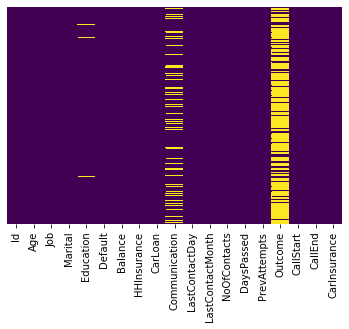

In [6]:
sns.heatmap(traindf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Education(NA), Communication(NA) and Outcome (NA) are the columns that comes with null

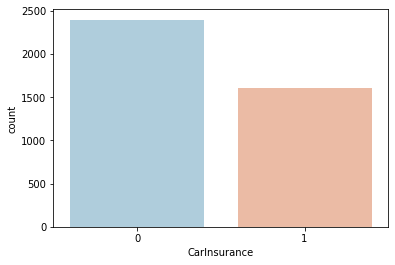

In [8]:
sns.countplot(x='CarInsurance',data=traindf,palette='RdBu_r')

In [9]:
# Roughly 2500 did not insure, and 1500 did

In [10]:
# Now we will see if there is any correlation between feature or columns

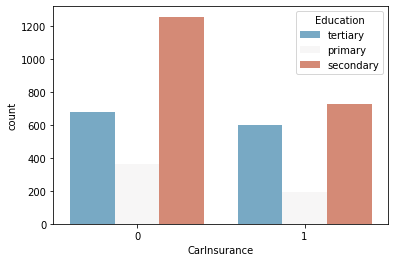

In [11]:
sns.countplot(x='CarInsurance',hue='Education',data=traindf,palette='RdBu_r')

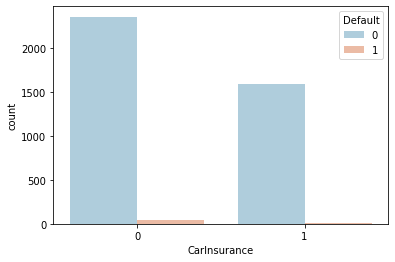

In [12]:
sns.countplot(x='CarInsurance',hue='Default',data=traindf,palette='RdBu_r')

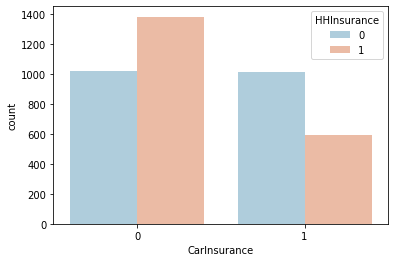

In [13]:
sns.countplot(x='CarInsurance',hue='HHInsurance',data=traindf,palette='RdBu_r')

In [14]:
# It seems more likely that you get insure if you do not hold a household insurance

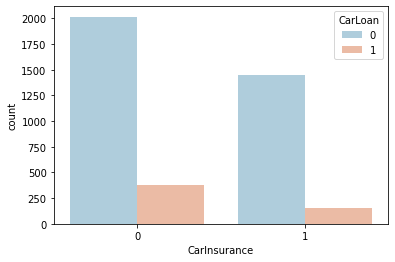

In [15]:
sns.countplot(x='CarInsurance',hue='CarLoan',data=traindf,palette='RdBu_r')

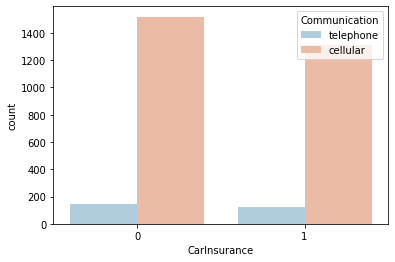

In [16]:
sns.countplot(x='CarInsurance',hue='Communication',data=traindf,palette='RdBu_r')

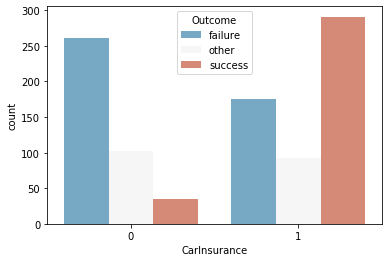

In [17]:
sns.countplot(x='CarInsurance',hue='Outcome',data=traindf,palette='RdBu_r')

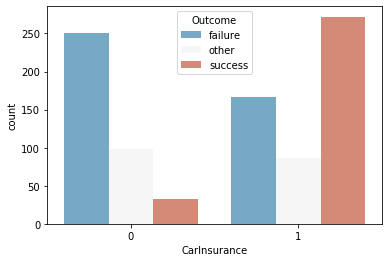

In [18]:
sns.countplot(x='CarInsurance',hue='Outcome',data=traindf.dropna(),palette='RdBu_r')

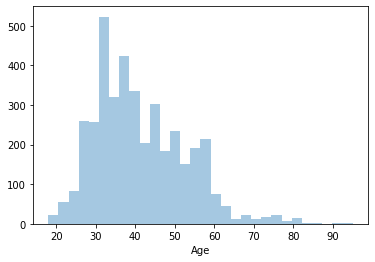

In [19]:
sns.distplot(traindf['Age'].dropna(),kde=False,bins=30)

In [20]:
pd.get_dummies(traindf['Marital'])

,divorced,married,single
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
3995,0,0,1
3996,1,0,0
3997,0,0,1
3998,0,0,1


In [21]:
Status = pd.get_dummies(traindf['Marital'])

In [22]:
Status.head

<bound method NDFrame.head of       divorced  married  single
0            0        0       1
1            0        1       0
2            0        0       1
3            0        0       1
4            0        1       0
...        ...      ...     ...
3995         0        0       1
3996         1        0       0
3997         0        0       1
3998         0        0       1
3999         0        1       0

[4000 rows x 3 columns]>

In [23]:
Status.drop(columns=['single'], inplace=True)

In [24]:
Status.head

<bound method NDFrame.head of       divorced  married
0            0        0
1            0        1
2            0        0
3            0        0
4            0        1
...        ...      ...
3995         0        0
3996         1        0
3997         0        0
3998         0        0
3999         0        1

[4000 rows x 2 columns]>

In [25]:
traindf = pd.concat([traindf, Status], axis=1)

In [26]:
traindf.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,...,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,divorced,married
0,1,32,management,single,tertiary,0,1218,1,0,telephone,...,jan,2,-1,0,NaN,13:45:20,13:46:30,0,0,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,...,may,5,-1,0,NaN,14:49:03,14:52:08,0,0,1
2,3,29,management,single,tertiary,0,637,1,0,cellular,...,jun,1,119,1,failure,16:30:24,16:36:04,1,0,0
3,4,25,student,single,primary,0,373,1,0,cellular,...,may,2,-1,0,NaN,12:06:43,12:20:22,1,0,0
4,5,30,management,married,tertiary,0,2694,0,0,cellular,...,jun,1,-1,0,NaN,14:35:44,14:38:56,0,0,1


In [27]:
traindf.drop(columns=['Marital'], inplace=True)

In [28]:
traindf.head()

,Id,Age,Job,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,divorced,married
0,1,32,management,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0,0,0
1,2,32,blue-collar,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0,0,1
2,3,29,management,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1,0,0
3,4,25,student,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1,0,0
4,5,30,management,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0,0,1


In [29]:
traindf.groupby(['Job']).count()

,Id,Age,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,divorced,married
Job,,,,,,,,,,,,,,,,,,,
admin.,459,459,445,459,459,459,459,354,459,459,459,459,459,120,459,459,459,459,459
blue-collar,759,759,728,759,759,759,759,472,759,759,759,759,759,136,759,759,759,759,759
entrepreneur,121,121,118,121,121,121,121,98,121,121,121,121,121,16,121,121,121,121,121
housemaid,109,109,105,109,109,109,109,86,109,109,109,109,109,15,109,109,109,109,109
management,893,893,867,893,893,893,893,764,893,893,893,893,893,245,893,893,893,893,893
retired,249,249,230,249,249,249,249,219,249,249,249,249,249,70,249,249,249,249,249
self-employed,140,140,133,140,140,140,140,106,140,140,140,140,140,28,140,140,140,140,140
services,330,330,321,330,330,330,330,234,330,330,330,330,330,71,330,330,330,330,330
student,131,131,106,131,131,131,131,120,131,131,131,131,131,48,131,131,131,131,131


In [30]:
all_jobs = pd.get_dummies(traindf['Job'])

In [31]:
traindf['Job'].fillna("Unknown", inplace = True) 

In [32]:
traindf.groupby(['Job']).count()

,Id,Age,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,divorced,married
Job,,,,,,,,,,,,,,,,,,,
Unknown,19,19,11,19,19,19,19,16,19,19,19,19,19,5,19,19,19,19,19
admin.,459,459,445,459,459,459,459,354,459,459,459,459,459,120,459,459,459,459,459
blue-collar,759,759,728,759,759,759,759,472,759,759,759,759,759,136,759,759,759,759,759
entrepreneur,121,121,118,121,121,121,121,98,121,121,121,121,121,16,121,121,121,121,121
housemaid,109,109,105,109,109,109,109,86,109,109,109,109,109,15,109,109,109,109,109
management,893,893,867,893,893,893,893,764,893,893,893,893,893,245,893,893,893,893,893
retired,249,249,230,249,249,249,249,219,249,249,249,249,249,70,249,249,249,249,249
self-employed,140,140,133,140,140,140,140,106,140,140,140,140,140,28,140,140,140,140,140
services,330,330,321,330,330,330,330,234,330,330,330,330,330,71,330,330,330,330,330


In [33]:
kk = list(traindf['Job'].unique())

In [34]:
kk

['management',
 'blue-collar',
 'student',
 'technician',
 'admin.',
 'services',
 'self-employed',
 'retired',
 'Unknown',
 'housemaid',
 'entrepreneur',
 'unemployed']

In [35]:
def job_to_num(cols):
    job = cols[0]
    list_jobs = list(traindf['Job'].unique())    
    return list_jobs.index(job)

In [36]:
traindf['Job'] = traindf[['Job']].apply(job_to_num,axis=1)

In [37]:
traindf.groupby(['Job']).count()

,Id,Age,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,divorced,married
Job,,,,,,,,,,,,,,,,,,,
0,893,893,867,893,893,893,893,764,893,893,893,893,893,245,893,893,893,893,893
1,759,759,728,759,759,759,759,472,759,759,759,759,759,136,759,759,759,759,759
2,131,131,106,131,131,131,131,120,131,131,131,131,131,48,131,131,131,131,131
3,660,660,639,660,660,660,660,518,660,660,660,660,660,156,660,660,660,660,660
4,459,459,445,459,459,459,459,354,459,459,459,459,459,120,459,459,459,459,459
5,330,330,321,330,330,330,330,234,330,330,330,330,330,71,330,330,330,330,330
6,140,140,133,140,140,140,140,106,140,140,140,140,140,28,140,140,140,140,140
7,249,249,230,249,249,249,249,219,249,249,249,249,249,70,249,249,249,249,249
8,19,19,11,19,19,19,19,16,19,19,19,19,19,5,19,19,19,19,19


In [38]:
traindf.groupby(['Education']).count()

,Id,Age,Job,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,divorced,married
Education,,,,,,,,,,,,,,,,,,,
primary,561,561,561,561,561,561,561,397,561,561,561,561,561,102,561,561,561,561,561
secondary,1988,1988,1988,1988,1988,1988,1988,1482,1988,1988,1988,1988,1988,465,1988,1988,1988,1988,1988
tertiary,1282,1282,1282,1282,1282,1282,1282,1090,1282,1282,1282,1282,1282,348,1282,1282,1282,1282,1282


In [39]:
traindf['Education'].fillna("Unknown", inplace = True) 

In [40]:
traindf.groupby(['Education']).count()

,Id,Age,Job,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,divorced,married
Education,,,,,,,,,,,,,,,,,,,
Unknown,169,169,169,169,169,169,169,129,169,169,169,169,169,43,169,169,169,169,169
primary,561,561,561,561,561,561,561,397,561,561,561,561,561,102,561,561,561,561,561
secondary,1988,1988,1988,1988,1988,1988,1988,1482,1988,1988,1988,1988,1988,465,1988,1988,1988,1988,1988
tertiary,1282,1282,1282,1282,1282,1282,1282,1090,1282,1282,1282,1282,1282,348,1282,1282,1282,1282,1282


In [41]:
def education_to_num(cols):
    job = cols[0]
    list_jobs = list(traindf['Education'].unique())    
    return list_jobs.index(job)

In [42]:
traindf['Education'] = traindf[['Education']].apply(education_to_num,axis=1)

In [43]:
traindf.groupby(['Education']).count()

,Id,Age,Job,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,divorced,married
Education,,,,,,,,,,,,,,,,,,,
0,1282,1282,1282,1282,1282,1282,1282,1090,1282,1282,1282,1282,1282,348,1282,1282,1282,1282,1282
1,561,561,561,561,561,561,561,397,561,561,561,561,561,102,561,561,561,561,561
2,1988,1988,1988,1988,1988,1988,1988,1482,1988,1988,1988,1988,1988,465,1988,1988,1988,1988,1988
3,169,169,169,169,169,169,169,129,169,169,169,169,169,43,169,169,169,169,169


In [44]:
traindf.groupby(['Communication']).count()

,Id,Age,Job,Education,Default,Balance,HHInsurance,CarLoan,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,divorced,married
Communication,,,,,,,,,,,,,,,,,,,
cellular,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,878,2831,2831,2831,2831,2831
telephone,267,267,267,267,267,267,267,267,267,267,267,267,267,74,267,267,267,267,267


In [45]:
all_jobs = pd.get_dummies(traindf['Communication'])

In [46]:
traindf['Communication'].fillna("Unknown", inplace = True) 

In [47]:
def comm_to_num(cols):
    job = cols[0]
    list_jobs = list(traindf['Communication'].unique())    
    return list_jobs.index(job)

In [48]:
traindf['Communication'] = traindf[['Communication']].apply(comm_to_num,axis=1)

In [49]:
traindf.groupby(['Communication']).count()

,Id,Age,Job,Education,Default,Balance,HHInsurance,CarLoan,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,divorced,married
Communication,,,,,,,,,,,,,,,,,,,
0,267,267,267,267,267,267,267,267,267,267,267,267,267,74,267,267,267,267,267
1,902,902,902,902,902,902,902,902,902,902,902,902,902,6,902,902,902,902,902
2,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,878,2831,2831,2831,2831,2831


In [50]:
def month_to_num(cols):
    job = cols[0]
    list_months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    return list_months.index(job) + 1

In [51]:
traindf['LastContactMonth'] = traindf[['LastContactMonth']].apply(month_to_num,axis=1)

In [52]:
traindf.groupby(['LastContactMonth']).count()

,Id,Age,Job,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance,divorced,married
LastContactMonth,,,,,,,,,,,,,,,,,,,
1,134,134,134,134,134,134,134,134,134,134,134,134,134,49,134,134,134,134,134
2,262,262,262,262,262,262,262,262,262,262,262,262,262,101,262,262,262,262,262
3,79,79,79,79,79,79,79,79,79,79,79,79,79,26,79,79,79,79,79
4,306,306,306,306,306,306,306,306,306,306,306,306,306,101,306,306,306,306,306
5,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,218,1049,1049,1049,1049,1049
6,454,454,454,454,454,454,454,454,454,454,454,454,454,53,454,454,454,454,454
7,573,573,573,573,573,573,573,573,573,573,573,573,573,49,573,573,573,573,573
8,536,536,536,536,536,536,536,536,536,536,536,536,536,90,536,536,536,536,536
9,101,101,101,101,101,101,101,101,101,101,101,101,101,67,101,101,101,101,101


In [53]:
traindf.groupby(['Outcome']).count()

,Id,Age,Job,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance,divorced,married
Outcome,,,,,,,,,,,,,,,,,,,
failure,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437
other,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
success,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326


In [54]:
traindf['Outcome'].fillna("Unknown", inplace = True) 

In [55]:
traindf.groupby(['Outcome']).count()

,Id,Age,Job,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance,divorced,married
Outcome,,,,,,,,,,,,,,,,,,,
Unknown,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042
failure,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437
other,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
success,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326


In [56]:
def outcome_to_num(cols):
    job = cols[0]
    list_jobs = list(traindf['Outcome'].unique())    
    return list_jobs.index(job)

In [57]:
traindf['Outcome'] = traindf[['Outcome']].apply(outcome_to_num,axis=1)

In [58]:
traindf.groupby(['Outcome']).count()

,Id,Age,Job,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance,divorced,married
Outcome,,,,,,,,,,,,,,,,,,,
0,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042,3042
1,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437,437
2,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
3,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326,326


In [59]:
traindf.dtypes

Id                   int64
Age                  int64
Job                  int64
Education            int64
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication        int64
LastContactDay       int64
LastContactMonth     int64
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome              int64
CallStart           object
CallEnd             object
CarInsurance         int64
divorced             uint8
married              uint8
dtype: object

In [60]:
# Create one column with the difference in seconds of callEnd - callStart, and keep only the hour for callStart

In [64]:
def get_sec(cols):
    """Get Seconds from time."""
    call_start = cols[0]
    call_end = cols[1]
    h1, m1, s1 = call_start.split(':')
    h2, m2, s2 = call_end.split(':')
    total_secs1 = int(h1) * 3600 + int(m1) * 60 + int(s1)
    total_secs2 = int(h2) * 3600 + int(m2) * 60 + int(s2)
    return total_secs2 - total_secs1

In [65]:
traindf['CallDuration'] = traindf[['CallStart', 'CallEnd']].apply(get_sec,axis=1)

In [68]:
traindf.drop(columns=['CallEnd'], inplace=True)

In [69]:
traindf.head()

,Id,Age,Job,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CarInsurance,divorced,married,CallDuration
0,1,32,0,0,0,1218,1,0,0,28,1,2,-1,0,0,13:45:20,0,0,0,70
1,2,32,1,1,0,1156,1,0,1,26,5,5,-1,0,0,14:49:03,0,0,1,185
2,3,29,0,0,0,637,1,0,2,3,6,1,119,1,1,16:30:24,1,0,0,340
3,4,25,2,1,0,373,1,0,2,11,5,2,-1,0,0,12:06:43,1,0,0,819
4,5,30,0,0,0,2694,0,0,2,3,6,1,-1,0,0,14:35:44,0,0,1,192


In [70]:
# Keep the hour for CallStart

In [73]:
traindf['CallStart'] = traindf['CallStart'].apply(lambda time_string: time_string[:2])

In [74]:
traindf.head()

,Id,Age,Job,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CarInsurance,divorced,married,CallDuration
0,1,32,0,0,0,1218,1,0,0,28,1,2,-1,0,0,13,0,0,0,70
1,2,32,1,1,0,1156,1,0,1,26,5,5,-1,0,0,14,0,0,1,185
2,3,29,0,0,0,637,1,0,2,3,6,1,119,1,1,16,1,0,0,340
3,4,25,2,1,0,373,1,0,2,11,5,2,-1,0,0,12,1,0,0,819
4,5,30,0,0,0,2694,0,0,2,3,6,1,-1,0,0,14,0,0,1,192


In [75]:
# Reorder columns in dataframe so CarInsurance be the last one

In [77]:
df1 = traindf.pop('CarInsurance')

In [80]:
traindf['CarInsurance'] = df1

In [81]:
traindf

,Id,Age,Job,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,divorced,married,CallDuration,CarInsurance
0,1,32,0,0,0,1218,1,0,0,28,1,2,-1,0,0,13,0,0,70,0
1,2,32,1,1,0,1156,1,0,1,26,5,5,-1,0,0,14,0,1,185,0
2,3,29,0,0,0,637,1,0,2,3,6,1,119,1,1,16,0,0,340,1
3,4,25,2,1,0,373,1,0,2,11,5,2,-1,0,0,12,0,0,819,1
4,5,30,0,0,0,2694,0,0,2,3,6,1,-1,0,0,14,0,1,192,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,3,0,0,0,1,0,2,25,5,1,40,2,1,17,0,0,269,1
3996,3997,49,4,2,0,124,1,1,2,29,7,19,-1,0,0,14,1,0,125,0
3997,3998,27,4,2,0,-400,0,1,2,8,7,1,-1,0,0,12,0,0,290,0
3998,3999,36,10,0,0,658,1,0,2,29,1,1,227,3,1,11,0,0,99,0


In [82]:
# Save our dataframe to a file

In [83]:
traindf.to_csv('clean_carInsurance_train.csv') 

# Training with Logistic Regression

In [85]:
# Although we have different training and tests sets, I will split training set for a first glance

In [84]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(traindf.drop('CarInsurance',axis=1), 
                                                    traindf['CarInsurance'], test_size=0.30, 
                                                    random_state=101)

In [89]:
# Now we have 2800 entries for train, and 1200 entries for tests

In [90]:
# Training and predicting

In [91]:
from sklearn.linear_model import LogisticRegression

In [99]:
logmodel = LogisticRegression( max_iter=400)
logmodel.fit(X_train,y_train)

/home/osboxes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# It seems we have to scale the data

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()

In [102]:
scaler.fit(traindf.drop('CarInsurance',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [103]:
scaled_features = scaler.transform(traindf.drop('CarInsurance',axis=1))

In [105]:
scaledTraindf = pd.DataFrame(scaled_features,columns=traindf.columns[:-1])
scaledTraindf.head()

,Id,Age,Job,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,divorced,married,CallDuration
0,-1.731618,-0.797900,-1.060033,-1.315843,-0.121299,-0.089700,1.014607,-0.391666,-2.721356,1.457548,-2.036690,-0.198200,-0.465975,-0.345220,-0.494085,-0.012348,-0.370585,-1.165543,-0.820716
1,-1.730752,-0.797900,-0.729881,-0.272351,-0.121299,-0.107359,1.014607,-0.391666,-1.063004,1.220138,-0.468875,0.780969,-0.465975,-0.345220,-0.494085,0.373512,-0.370585,0.857969,-0.484649
2,-1.729886,-1.057669,-1.060033,-1.315843,-0.121299,-0.255179,1.014607,-0.391666,0.595348,-1.510074,-0.076921,-0.524590,0.658968,0.135923,0.600841,1.145231,-0.370585,-1.165543,-0.031690
3,-1.729020,-1.404026,-0.399730,-0.272351,-0.121299,-0.330371,1.014607,-0.391666,0.595348,-0.560435,-0.468875,-0.198200,-0.465975,-0.345220,-0.494085,-0.398207,-0.370585,-1.165543,1.368102
4,-1.728154,-0.971079,-1.060033,-1.315843,-0.121299,0.330692,-0.985604,-0.391666,0.595348,-1.510074,-0.076921,-0.524590,-0.465975,-0.345220,-0.494085,0.373512,-0.370585,0.857969,-0.464193


In [116]:
# Running with default solver solver='lbfgs' I get an error of failed to converge
#logmodel = LogisticRegression( max_iter=400)
logmodel = LogisticRegression( max_iter=400, solver='newton-cg')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
predictions = logmodel.predict(X_test)

In [118]:
# Evaluation

In [121]:
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       718
           1       0.80      0.71      0.75       482

    accuracy                           0.81      1200
   macro avg       0.81      0.79      0.80      1200
weighted avg       0.81      0.81      0.81      1200



In [123]:
print(confusion_matrix(y_test,predictions))

[[631  87]
 [140 342]]
